In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
# Load the dataset
df_daily = pd.read_csv(r"/Users/user/Desktop/HN/Hanoi Daily.csv")

print("Shape of data:", df_daily.shape)
df_daily.head()

Shape of data: (3927, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hanoi,2015-01-01,24.0,11.4,17.7,24.0,11.4,17.7,9.4,63.8,0.0,0,0.0,NaN,0,0,25.2,13.0,78.3,1023.4,0.4,7.2,197.4,17.1,7,NaN,2015-01-01T06:33:34,2015-01-01T17:26:18,0.36,Clear,Clear conditions throughout the day.,clear-day,"48820099999,48823099999,48825099999,4883109999..."
1,Hanoi,2015-01-02,22.0,11.0,16.3,22.0,11.0,16.3,9.4,65.6,0.0,0,0.0,NaN,0,0,23.4,13.9,99.8,1022.7,28.3,7.7,187.6,16.2,7,NaN,2015-01-02T06:33:53,2015-01-02T17:26:56,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
2,Hanoi,2015-01-03,21.0,13.1,17.0,21.0,13.1,17.0,12.4,75.6,0.0,0,0.0,NaN,0,0,21.6,13.0,97.0,1020.0,42.0,6.0,115.5,9.9,4,NaN,2015-01-03T06:34:11,2015-01-03T17:27:34,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
3,Hanoi,2015-01-04,22.6,16.9,19.3,22.6,16.9,19.3,16.1,82.0,0.6,100,25.0,rain,0,0,25.2,17.2,98.7,1013.5,88.0,6.3,64.3,5.6,3,NaN,2015-01-04T06:34:28,2015-01-04T17:28:12,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
4,Hanoi,2015-01-05,23.0,18.5,20.4,23.0,18.5,20.4,18.4,88.4,0.0,0,0.0,NaN,0,0,19.1,13.0,85.7,1011.2,90.6,4.2,93.7,7.9,4,NaN,2015-01-05T06:34:44,2015-01-05T17:28:51,0.50,Overcast,Cloudy skies throughout the day.,cloudy,"48820099999,48823099999,48825099999,4883109999..."


In [5]:
df_daily.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3927 non-null   object 
 1   datetime          3927 non-null   object 
 2   tempmax           3927 non-null   float64
 3   tempmin           3927 non-null   float64
 4   temp              3927 non-null   float64
 5   feelslikemax      3927 non-null   float64
 6   feelslikemin      3927 non-null   float64
 7   feelslike         3927 non-null   float64
 8   dew               3927 non-null   float64
 9   humidity          3927 non-null   float64
 10  precip            3927 non-null   float64
 11  precipprob        3927 non-null   int64  
 12  precipcover       3927 non-null   float64
 13  preciptype        2885 non-null   object 
 14  snow              3927 non-null   int64  
 15  snowdepth         3927 non-null   int64  
 16  windgust          3927 non-null   float64


In [ ]:
# Check categorical-like columns
for col in df_daily.select_dtypes(include='object').columns:
    print(f"{col}: {df_daily[col].nunique()} unique values")


name: 1 unique values
datetime: 3927 unique values
preciptype: 1 unique values
sunrise: 3927 unique values
sunset: 3927 unique values
conditions: 6 unique values
description: 36 unique values
icon: 4 unique values
stations: 32 unique values


#  Diagnosing and correcting data types

In [8]:
# Fix incorrect data types
datetime_cols = ['datetime', 'sunrise', 'sunset']
for col in datetime_cols:
    df_daily[col] = pd.to_datetime(df_daily[col], errors='coerce')

categorical_cols = ['name', 'preciptype', 'conditions', 'description', 'icon', 'stations']
for col in categorical_cols:
    df_daily[col] = df_daily[col].astype('category')


In [ ]:
# Recheck data types
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              3927 non-null   category      
 1   datetime          3927 non-null   datetime64[ns]
 2   tempmax           3927 non-null   float64       
 3   tempmin           3927 non-null   float64       
 4   temp              3927 non-null   float64       
 5   feelslikemax      3927 non-null   float64       
 6   feelslikemin      3927 non-null   float64       
 7   feelslike         3927 non-null   float64       
 8   dew               3927 non-null   float64       
 9   humidity          3927 non-null   float64       
 10  precip            3927 non-null   float64       
 11  precipprob        3927 non-null   int64         
 12  precipcover       3927 non-null   float64       
 13  preciptype        2885 non-null   category      
 14  snow              3927 n

# Separate variable groups

In [25]:
cat_cols = df_daily.select_dtypes(include=['category']).columns.tolist()
print("Numerical columns:", num_cols)
cat_cols = df_daily.select_dtypes(include=['category']).columns.tolist()
print("Categorical columns:", cat_cols)
time_cols = df_daily.select_dtypes(include=['datetime']).columns.tolist()
print("Datetime columns:", time_cols)

Numerical columns: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']
Categorical columns: ['name', 'preciptype', 'conditions', 'description', 'icon', 'stations']
Datetime columns: ['datetime', 'sunrise', 'sunset']


In [28]:
df_daily.describe()


,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase
count,3927,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,3927.000000,3927.000000,3927.000000,3927.0,3927.0,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,1361.000000,3927,3927,3927.000000
mean,2020-05-17 00:00:00,28.515152,21.934963,24.898370,32.620550,22.703107,27.397021,20.488541,78.27344,5.226019,72.167049,8.221225,0.0,0.0,27.022587,17.394423,126.961268,1011.085358,63.828928,8.605602,155.118386,13.388719,5.84441,28.518736,2020-05-17 05:51:52.353450496,2020-05-17 18:01:52.471352064,0.483990
min,2015-01-01 00:00:00,8.000000,5.900000,7.000000,8.000000,2.100000,4.600000,-2.000000,31.00000,0.000000,0.000000,0.000000,0.0,0.0,7.200000,6.500000,0.000000,991.100000,0.000000,2.400000,0.000000,0.000000,0.00000,5.000000,2015-01-01 06:33:34,2015-01-01 17:26:18,0.000000
25%,2017-09-08 12:00:00,24.100000,18.000000,21.000000,24.100000,18.000000,21.000000,16.850000,72.20000,0.000000,0.000000,0.000000,0.0,0.0,21.600000,13.900000,61.900000,1005.200000,49.350000,7.700000,91.100000,7.800000,4.00000,10.000000,2017-09-08 17:42:01.500000,2017-09-09 06:05:57,0.250000
50%,2020-05-17 00:00:00,29.500000,23.000000,26.100000,32.700000,23.000000,27.100000,22.500000,79.80000,0.267000,100.000000,4.170000,0.0,0.0,25.900000,16.600000,109.300000,1010.700000,67.300000,9.000000,154.100000,13.300000,6.00000,10.000000,2020-05-17 05:18:11,2020-05-17 18:28:05,0.500000
75%,2023-01-23 12:00:00,33.000000,26.000000,29.000000,41.300000,26.000000,33.900000,25.200000,85.80000,2.595000,100.000000,12.500000,0.0,0.0,31.000000,20.500000,131.900000,1016.500000,82.300000,9.800000,216.600000,18.700000,8.00000,60.000000,2023-01-23 18:35:47.500000,2023-01-24 05:41:19,0.750000
max,2025-10-01 00:00:00,41.900000,31.000000,35.500000,52.500000,40.400000,46.200000,28.500000,100.00000,333.117000,100.000000,100.000000,0.0,0.0,118.800000,53.600000,359.800000,1037.200000,100.000000,12.600000,323.500000,27.900000,10.00000,100.000000,2025-10-01 05:47:40,2025-10-01 17:44:44,0.980000
std,NaN,5.842098,4.870462,5.139137,9.530943,6.075115,7.734238,5.783574,10.76699,15.895322,44.823360,10.936552,0.0,0.0,8.080222,4.999515,97.746225,7.142712,23.636997,1.756703,77.239502,6.676342,2.47802,24.089535,NaN,NaN,0.288759


# **Diagnosing and correcting data types**
## *General observation:*
The dataset contains 3,927 daily records of Hanoi’s weather data from 2015 to 2025. Most variables show reasonable and consistent statistical ranges, with some minor anomalies worth noting.    
## *Detailed insights:*
**Temperature-related variables (tempmax, tempmin, temp, feelslike):**
- Mean temperatures range from ~22°C (min) to ~28°C (max), realistic for Hanoi.

- Maximum of feelslikemax (52.5°C) is unusually high, possibly due to data recording or calculation error.

- Overall, temperature distribution reflects typical tropical climate patterns.
   
**Humidity (humidity):**
- Mean ≈ 78%, ranging from 0–100%.

- A few zero values are unrealistic — likely missing or sensor errors.

**Precipitation variables (precip, precipprob, precipcover):**

- precip maximum (333 mm) indicates heavy rainfall days.

- precipprob and precipcover average values (~72% and ~8%) are plausible for a humid region.

- The zeros may represent dry days rather than missing data.
**Wind (windgust, windspeed, winddir):**
- windspeed averages around 17 km/h — typical.

- Max gust (118.8 km/h) may reflect a storm event.

- Wind direction (mean ~127°) suggests prevailing southeast winds.

**Pressure (sealevelpressure):** Mean ≈ 1011 hPa, within normal atmospheric range (990–1037).

**Solar & UV variables (solarradiation, solarenergy, uvindex):**
- Mean solar radiation (~155 W/m²) and UV index (~5.8) are reasonable.

- Both vary seasonally, higher in summer months.

**Visibility & Cloud cover:**
- Mean visibility ≈ 8.6 km, generally good air clarity.

- Cloud cover average (63%) aligns with local humidity.

**Other columns:**
- snow, snowdepth are all zeros — expected for Hanoi.

- severerisk has only ~1,361 non-null entries → significant missing data.

- moonphase distributed 0–1 as expected for lunar cycles.
## *Initial assessment:*
- Data values mostly fall within reasonable environmental ranges.
- Minor anomalies include: extreme feelslikemax, zero humidity, and incomplete severerisk.

-> These should be validated or handled during data cleaning.












# **Correlation Matrix:**

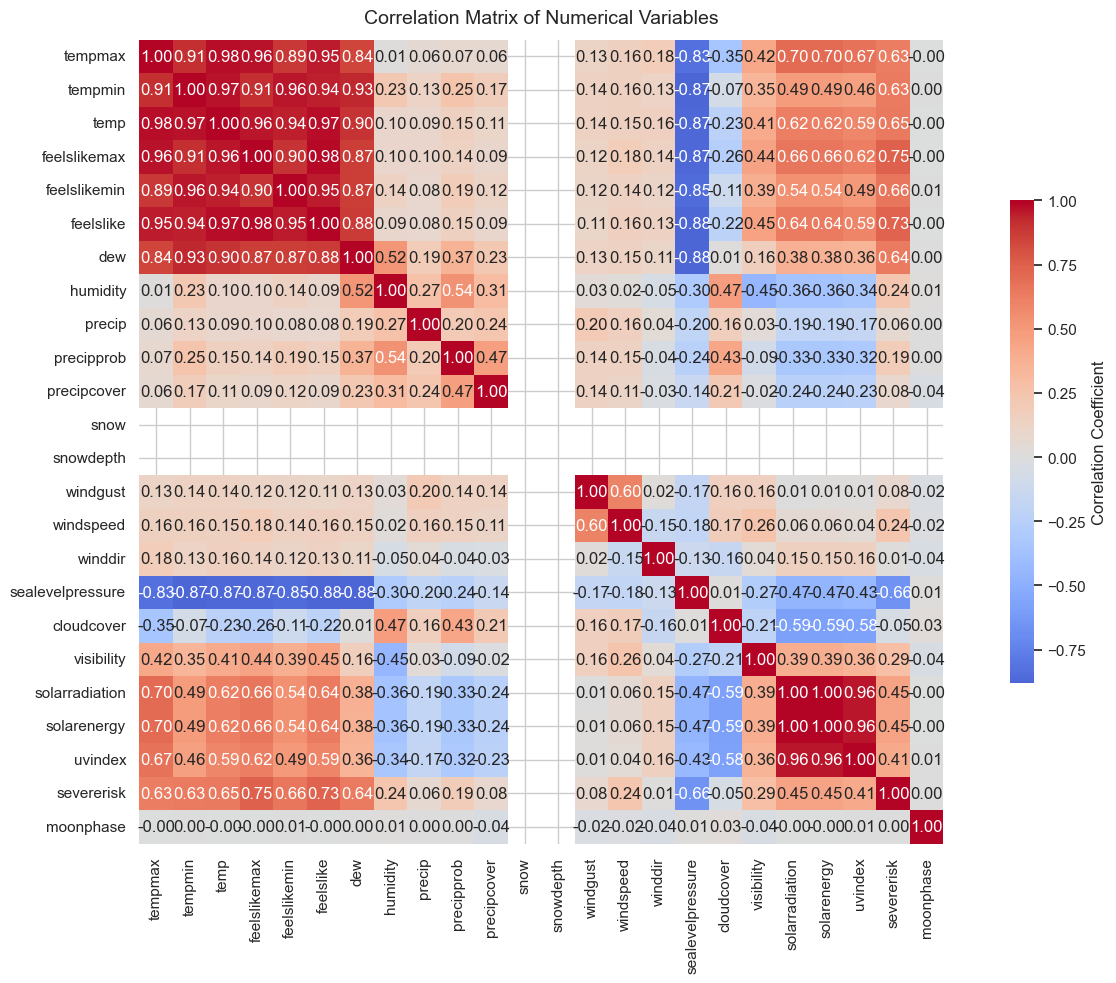

In [31]:
num_df = df_daily.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={'shrink': 0.6, 'label': 'Correlation Coefficient'}
)
plt.title("Correlation Matrix of Numerical Variables", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

## *Correlation Insights (English Version)*

**General observation:**
The correlation matrix shows strong linear relationships between temperature-related variables and moderate-to-low correlations with environmental or wind features. A few negative correlations appear with pressure and cloud-related variables.

**1. Relationship with Target Variable (temp)**

- *Strong positive correlations:*

tempmax (r = 0.98), tempmin (r = 0.97), feelslike (r = 0.97), feelslikemax (r = 0.94), and feelslikemin (r = 0.94).
→ These variables are almost collinear with temp. They describe the same temperature behavior, so only one (e.g., temp) should be kept for modeling to avoid multicollinearity.

- *Moderate positive correlations:*

dew (r ≈ 0.87) → higher dew point means higher air temperature and humidity.

solarradiation, solarenergy, uvindex (r ≈ 0.65–0.70) → warmer days often have stronger sunlight and higher UV exposure.

- *Negative correlations:* 

sealevelpressure (r ≈ –0.88) → strong inverse relationship, typical in tropical climates: high temperature usually corresponds to lower atmospheric pressure.

cloudcover (r ≈ –0.26 to –0.35) → more clouds tend to reduce temperature slightly.

**2. Relationships among Independent Variables**

- Temperature family (tempmax, tempmin, feelslike*) are extremely correlated (r > 0.95), indicating redundancy.

- Solar variables (solarradiation, solarenergy, uvindex) correlate very strongly (r > 0.9), suggesting they represent similar sunlight intensity patterns.

- Wind variables (windspeed, windgust) show moderate correlation (r = 0.6).

- Cloudcover vs Solar metrics: negatively correlated (r ≈ –0.59), which is logical since heavy cloud cover reduces solar energy.

**3. Weak / Unrelated Variables**

- precip, precipprob, and precipcover show very low correlation (|r| < 0.25) with temperature → rainfall does not linearly impact daily average temperature.

- snow and snowdepth are constant (zero), thus non-informative.

- moonphase has near-zero correlation with all variables → can be safely ignored.

- severerisk shows weak to moderate correlation (0.45–0.65) with sunlight and temperature but contains many missing values → may need imputation or removal.

## *Initial Conclusions*

- Highly correlated groups (temperature set, solar set) → keep only one representative variable from each to prevent multicollinearity.

- Low-impact variables (precipitation, moonphase, snow) may be excluded for modeling.

- Pressure, humidity, cloudcover, solar metrics are more meaningful drivers for temperature prediction.